# Imports:

In [4]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime
import numpy as np
import pandas as pd
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import cmdstanpy
import random
import seaborn as sns

## Ex 1:

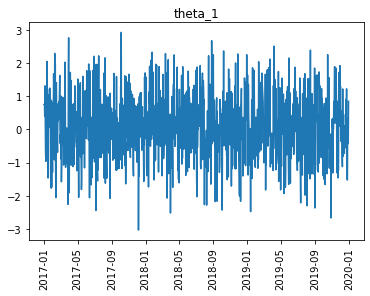

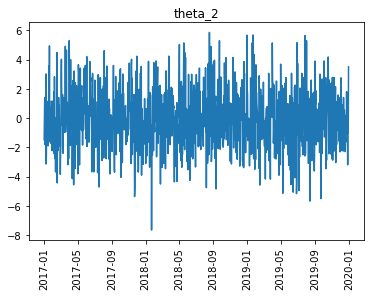

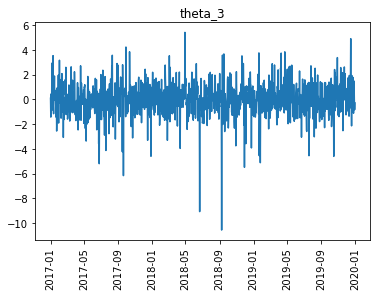

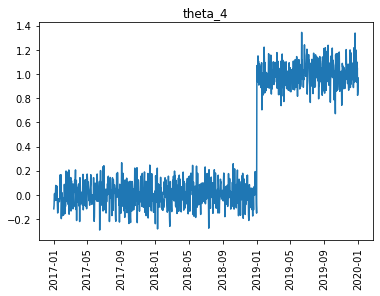

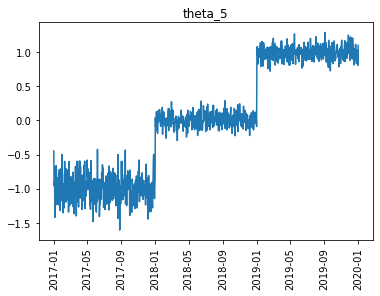

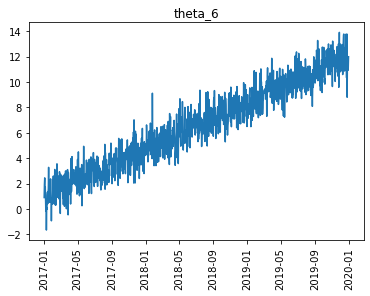

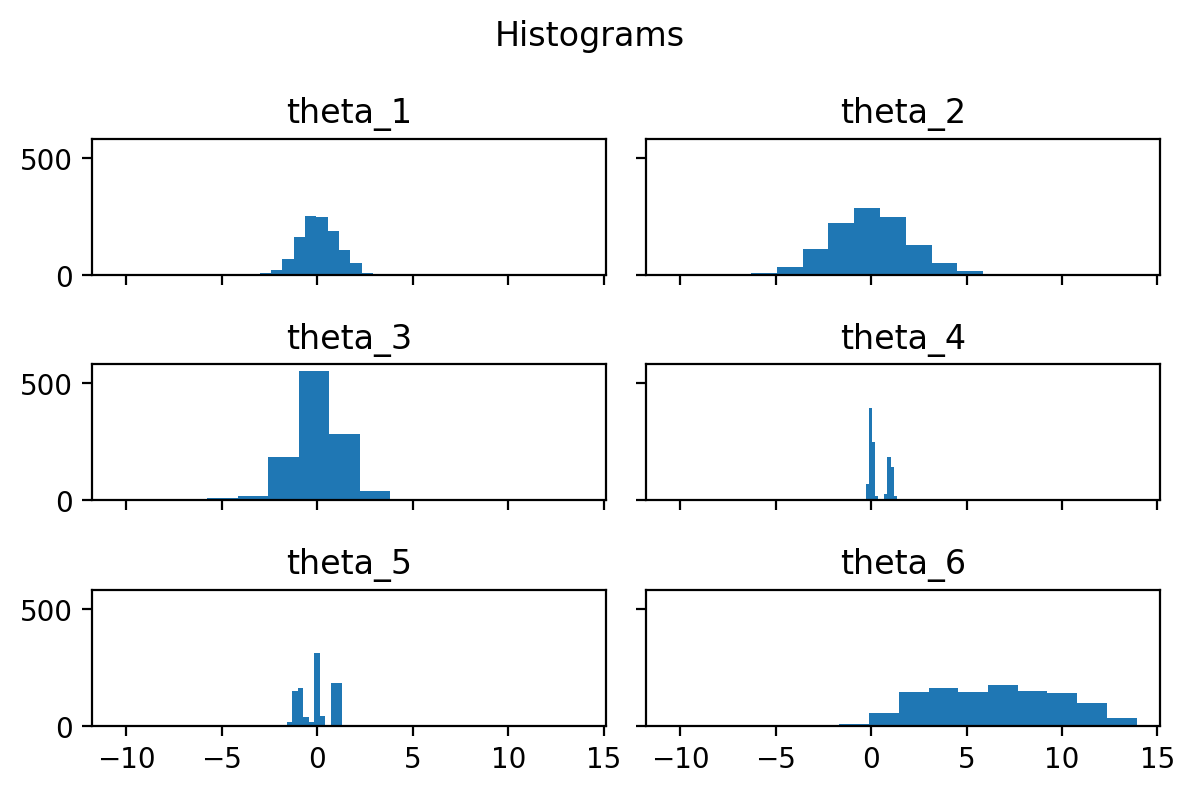

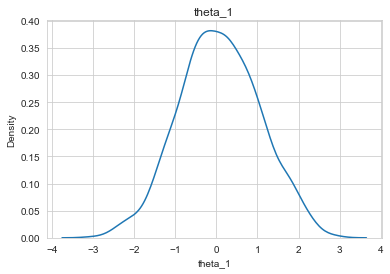

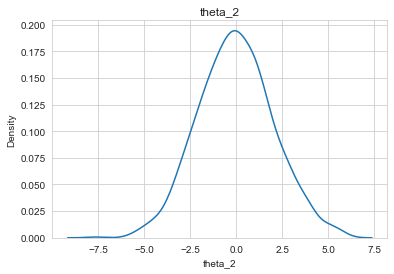

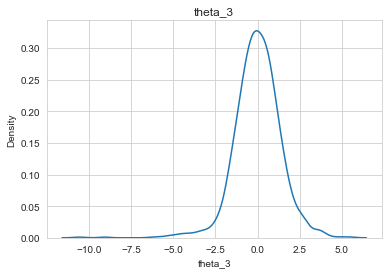

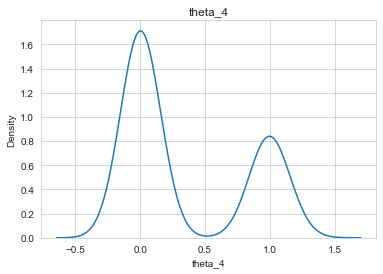

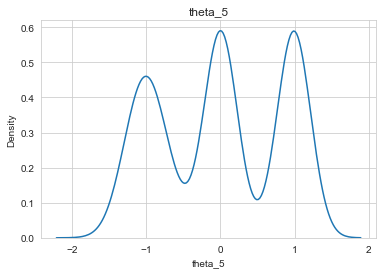

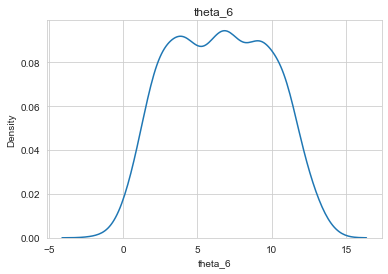

In [2]:
with open("Data1.csv") as csvfile:
    csvreader = csv.reader(csvfile)

    data = []                                   #list for data
    for row in csvreader:                       #iterate over each csv row
        data.append(row)                        #append csv record to data list

    data = np.array(data)                       #convert data to numpy array
    headers = data[0,1:]                           #csv column headers

    timestamps = data[1:,0]
    #timestamps = dates.num2date(dates.datestr2num(timestamps))
    timestamps = pd.to_datetime(timestamps,format='%Y-%m-%d %H:%M:%S',errors='coerce')
    
    data = data[1:,1:]
    data = data.astype(float)

    df = pd.DataFrame(data, columns = headers, index = timestamps)

    for column in df:
        plt.plot(df[column])
        plt.xticks(rotation = 90)
        plt.title(column)
        plt.show()

    fig, axs = plt.subplots(3, 2, sharex = True, sharey = True)
    fig.set_tight_layout(True)
    fig.suptitle("Histograms")
    fig.set_dpi(200)
    axs = axs.reshape(-1)
    for i in range(len(df.columns)):
        axs[i].hist(df[df.columns[i]])
        axs[i].title.set_text(df.columns[i])
    
    plt.show()

    for column in df:
        sns.set_style('whitegrid')
        sns.kdeplot(df[column])
        plt.title(column)
        plt.show()

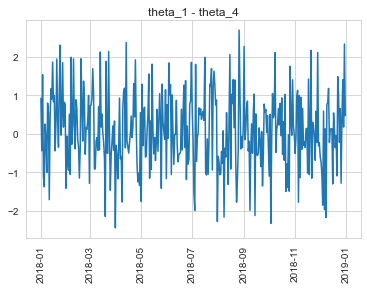

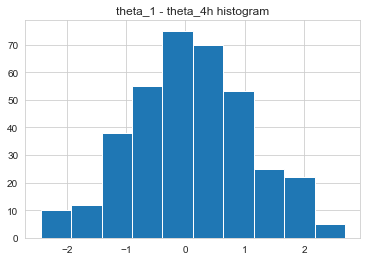

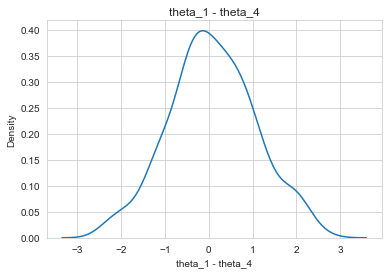

In [3]:
df["theta_1 - theta_4"]= df["theta_1"] - df["theta_4"]
filtered_df = df[df.index.to_series().dt.year == 2018]

plt.plot(filtered_df["theta_1 - theta_4"])
plt.xticks(rotation = 90)
plt.title("theta_1 - theta_4")
plt.show()

plt.hist(filtered_df["theta_1 - theta_4"])
plt.title("theta_1 - theta_4h histogram")
plt.show()

sns.set_style('whitegrid')
sns.kdeplot(filtered_df["theta_1 - theta_4"])
plt.title("theta_1 - theta_4")
plt.show()

# Ex 2:

{'N': 12, 'y': [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]}


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


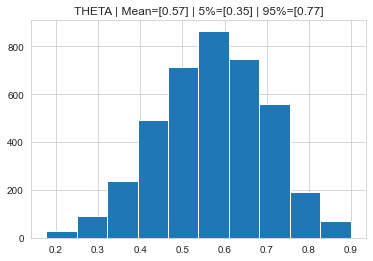

In [39]:
first_name = "Jakub"
last_name = "Burczyk"

samples = [0] * len(first_name) + [1] * len(last_name)
random.shuffle(samples)

dataset = {"N": len(first_name + last_name), "y": samples}
print(dataset)

stan_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')

model = CmdStanModel(stan_file=stan_file)

bern_fit = model.sample(dataset)
summary = bern_fit.summary()
stan_theta = pd.DataFrame(bern_fit.stan_variable("theta"))
theta_summary = summary[summary.index.to_series()=="theta"]
plt.hist(stan_theta)
plt.title(f"THETA | Mean={theta_summary['Mean'].values} | 5%={theta_summary['5%'].values} | 95%={theta_summary['95%'].values}")
plt.show()
